<a href="https://colab.research.google.com/github/olaidekashimawo/student-performance-classification/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predict Student Performance in Secondary education (High School).**

Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import shap

# UCI Student Performance Dataset Attributes

## Demographics
- **school**: Student’s school (binary: 'GP' = Gabriel Pereira, 'MS' = Mousinho da Silveira)
- **sex**: Student’s sex (binary: 'F' = female, 'M' = male)
- **age**: Age of the student (numeric: 15–22)
- **address**: Home address type (binary: 'U' = urban, 'R' = rural)
- **famsize**: Family size (binary: 'LE3' = ≤ 3, 'GT3' = > 3)
- **Pstatus**: Parent’s cohabitation status (binary: 'T' = living together, 'A' = apart)

## Parental Information
- **Medu**: Mother’s education (numeric: 0 = none, 1 = primary, 2 = 5th–9th grade, 3 = secondary, 4 = higher education)
- **Fedu**: Father’s education (same scale as Medu)
- **Mjob**: Mother’s job (categorical: 'teacher', 'health', 'services', 'at_home', 'other')
- **Fjob**: Father’s job (categorical: same as Mjob)
- **guardian**: Student’s guardian (categorical: 'mother', 'father', 'other')

## Academic Context
- **reason**: Reason for choosing this school (categorical: 'home', 'reputation', 'course', 'other')
- **traveltime**: Home-to-school travel time (numeric: 1 = <15 min, 2 = 15–30 min, 3 = 30–60 min, 4 = >60 min)
- **studytime**: Weekly study time (numeric: 1 = <2 hours, 2 = 2–5 hours, 3 = 5–10 hours, 4 = >10 hours)
- **failures**: Number of past class failures (numeric: n if 1 ≤ n < 3, else 4)

## School Support
- **schoolsup**: Extra educational support (binary: 'yes', 'no')
- **famsup**: Family educational support (binary: 'yes', 'no')
- **paid**: Extra paid classes within the course subject (binary: 'yes', 'no')
- **activities**: Extra-curricular activities (binary: 'yes', 'no')
- **nursery**: Attended nursery school (binary: 'yes', 'no')
- **higher**: Wants to take higher education (binary: 'yes', 'no')
- **internet**: Internet access at home (binary: 'yes', 'no')
- **romantic**: In a romantic relationship (binary: 'yes', 'no')

## Social and Family Life
- **famrel**: Quality of family relationships (numeric: 1 = very bad, 5 = excellent)
- **freetime**: Free time after school (numeric: 1 = very low, 5 = very high)
- **goout**: Going out with friends (numeric: 1 = very low, 5 = very high)
- **Dalc**: Workday alcohol consumption (numeric: 1 = very low, 5 = very high)
- **Walc**: Weekend alcohol consumption (numeric: 1 = very low, 5 = very high)
- **health**: Current health status (numeric: 1 = very bad, 5 = very good)
- **absences**: Number of school absences (numeric: 0–93)

## Academic Performance (Targets)
- **G1**: First period grade (numeric: 0–20)
- **G2**: Second period grade (numeric: 0–20)
- **G3**: Final grade (numeric: 0–20) → **target variable**

Data Exploration (EDA)


1.  Load  the dataset using Pandas
2.   Then check for missing values,  are the columns  categorical or numercial?
3.  Visualize  relationships like  the scores vs. parental education

* Student-mat.csv → student performance in mathematics.
* Student-por.csv → student performance in Portuguese.



 CSV isn’t being parsed correctly,This is super common with the UCI Student Performance dataset because it uses semicolon (;) as a delimiter, not commas.

In [34]:
data = pd.read_csv("/content/student-por.csv", sep=";")


In [35]:
data_2 = pd.read_csv("/content/student-mat.csv",sep=";")


In [31]:
#merge both dataframes
df = pd.concat([data, data_2], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

* Note: Each file has 33 features (school, age, sex, studytime, absences, grades G1/G2/G3)
* There are no missing values, I will check for duplicate then proceed

In [33]:
#displaying the dataframe
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_por,G2_por,G3_por,G1_mat,G2_mat,G3_mat
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,13,12,13,12,12,11
1,GP,M,15,U,GT3,A,2,2,other,other,...,1,1,3,0,14,14,15,14,16,16
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,1,0,12,13,14,13,14,15
3,GP,M,15,U,GT3,T,4,4,health,health,...,1,1,5,0,11,12,12,12,15,15
4,GP,M,15,U,GT3,T,4,4,health,services,...,3,4,5,0,10,11,11,9,11,12


* What approach will be best  since it is a classification problem?
  * My goal is to predict a discrete category or class for an input, rather than a continuous numerical value, which is to show if the student pass or not using binary  Classification
  * I will later work on Multi-Class Classification (Grade Categories)

In [36]:
#importing more libriaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
 #reset the index
df.reset_index(drop=True, inplace=True)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_por,G2_por,G3_por,G1_mat,G2_mat,G3_mat
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,13,12,13,12,12,11
1,GP,M,15,U,GT3,A,2,2,other,other,...,1,1,3,0,14,14,15,14,16,16
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,1,0,12,13,14,13,14,15
3,GP,M,15,U,GT3,T,4,4,health,health,...,1,1,5,0,11,12,12,12,15,15
4,GP,M,15,U,GT3,T,4,4,health,services,...,3,4,5,0,10,11,11,9,11,12


In [42]:
# Create a new 'G3' column by averaging 'G3_por' and 'G3_mat'
df['G3'] = (df['G3_por'] + df['G3_mat']) / 2

# Display the first few rows with the new 'G3' column
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1_por,G2_por,G3_por,G1_mat,G2_mat,G3_mat,passed,G3
0,GP,M,16,U,LE3,T,2,2,other,other,...,3,0,13,12,13,12,12,11,1,12.0
1,GP,M,15,U,GT3,A,2,2,other,other,...,3,0,14,14,15,14,16,16,1,15.5
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,0,12,13,14,13,14,15,1,14.5
3,GP,M,15,U,GT3,T,4,4,health,health,...,5,0,11,12,12,12,15,15,1,13.5
4,GP,M,15,U,GT3,T,4,4,health,services,...,5,0,10,11,11,9,11,12,1,11.5


In [43]:
# Define the passing threshold
passing_threshold = 10

# Create a new binary target variable 'passed'
df['passed'] = (df['G3'] >= passing_threshold).astype(int)

# Display the first few rows with the new column
display(df.head())

# Display the distribution of the new target variable
display(df['passed'].value_counts())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1_por,G2_por,G3_por,G1_mat,G2_mat,G3_mat,passed,G3
0,GP,M,16,U,LE3,T,2,2,other,other,...,3,0,13,12,13,12,12,11,1,12.0
1,GP,M,15,U,GT3,A,2,2,other,other,...,3,0,14,14,15,14,16,16,1,15.5
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,0,12,13,14,13,14,15,1,14.5
3,GP,M,15,U,GT3,T,4,4,health,health,...,5,0,11,12,12,12,15,15,1,13.5
4,GP,M,15,U,GT3,T,4,4,health,services,...,5,0,10,11,11,9,11,12,1,11.5


,count
passed,
1,34
0,5


In [44]:
# Define the target variable
y = df['passed']

# Define the features (exclude the target and original grade columns)
# Also exclude the combined G3 column as it's directly derived from the original grades
X = df.drop(['passed', 'G1_por', 'G2_por', 'G3_por', 'G1_mat', 'G2_mat', 'G3_mat', 'G3'], axis=1)

# Display the first few rows of features and target to verify
display(X.head())
display(y.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,4,4,1,1,3,0
1,GP,M,15,U,GT3,A,2,2,other,other,...,yes,yes,yes,4,5,2,1,1,3,0
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,yes,yes,no,4,4,1,1,1,1,0
3,GP,M,15,U,GT3,T,4,4,health,health,...,yes,yes,no,5,4,2,1,1,5,0
4,GP,M,15,U,GT3,T,4,4,health,services,...,yes,yes,no,5,4,2,3,4,5,0


,passed
0,1
1,1
2,1
3,1
4,1


Correlation Matrix:


,studytime,failures,absences
studytime,1.000000,-0.152024,-0.075594
failures,-0.152024,1.000000,0.099998
absences,-0.075594,0.099998,1.000000


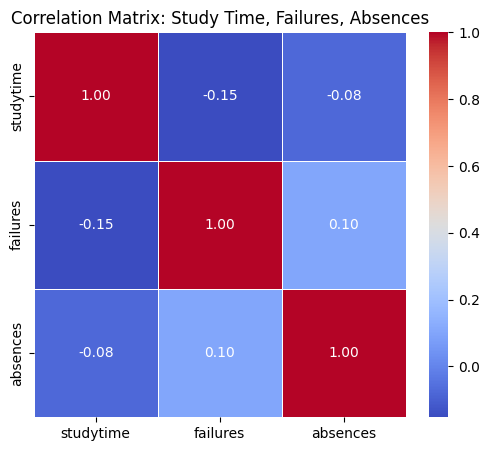

In [97]:
# Select the specific columns for correlation analysis
correlation_cols = ['studytime', 'failures', 'absences']
correlation_df = df[correlation_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Study Time, Failures, Absences')
plt.show()

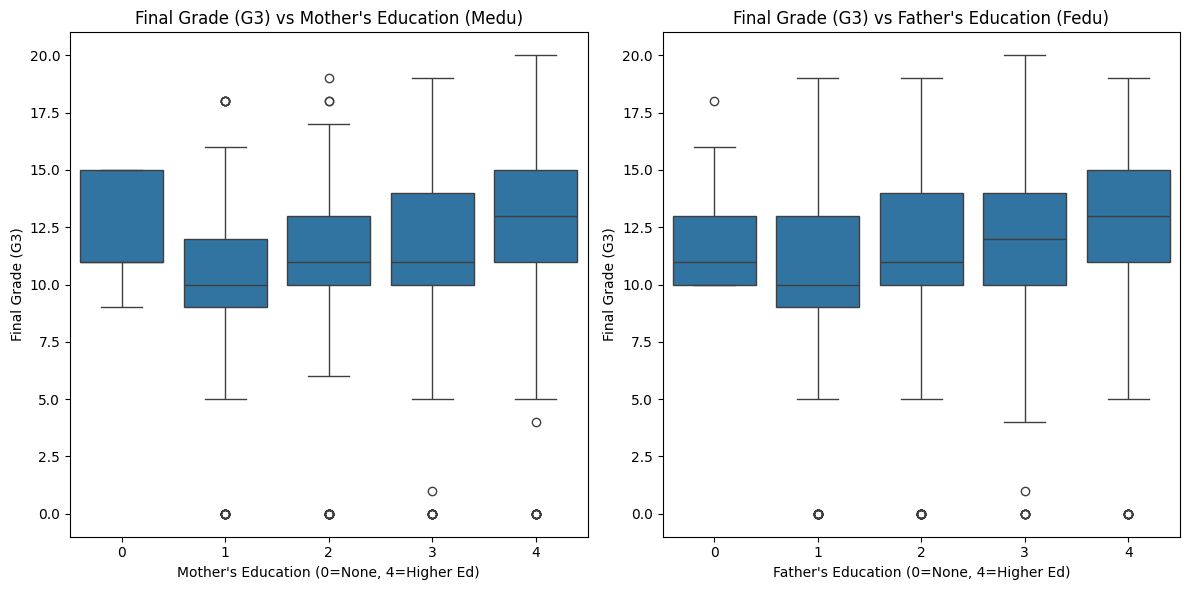

In [99]:
# Visualize the relationship between G3 and parental education
plt.figure(figsize=(12, 6))

# Box plot for G3 vs Mother's Education (Medu)
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Final Grade (G3) vs Mother's Education (Medu)")
plt.xlabel("Mother's Education (0=None, 4=Higher Ed)")
plt.ylabel("Final Grade (G3)")

# Box plot for G3 vs Father's Education (Fedu)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Final Grade (G3) vs Father's Education (Fedu)")
plt.xlabel("Father's Education (0=None, 4=Higher Ed)")
plt.ylabel("Final Grade (G3)")

plt.tight_layout()
plt.show()

** Looking at these plots, we can observe some trends:

* Generally, there appears to be a positive association between higher levels of both mother's and father's education and higher median final grades (G3).
* Students with parents who have higher education levels (Medu/Fedu 3 and 4) tend to have higher median G3 scores compared to students whose parents have lower education levels (Medu/Fedu 0, 1, and 2).
* The spread of grades (indicated by the box height and whiskers) also seems to vary across education levels.
These visualizations suggest that parental education is a factor that might influence student performance

## Preprocessing: OneHotEncode categoricals, pass-through numerics

In [45]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Display the identified features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Numerical Features: Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (31, 30)
Shape of X_test: (8, 30)
Shape of y_train: (31,)
Shape of y_test: (8,)


 ## Build the Models

In [49]:
## Logistic Regression
## Logistic Regression
log_reg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

## Decision Tree
tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

## Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

# Step 7: Train & evaluate models
models = {
    "Logistic Regression": log_reg_pipeline,
    "Decision Tree": tree_pipeline,
    "Random Forest": rf_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      1.00      0.93         7

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8

[[0 1]
 [0 7]]

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      1.00      0.93         7

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8

[[0 1]
 [0 7]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      1.00      0.93         7

    accuracy                           0.88         8
   macro avg       0.44

### All Models result look the Same

  * In the test set, there are 7 “Pass” (class 1) and only 1 “Fail” (class 0).
	* The models are just predicting everything as Pass.
	* That’s why accuracy = 0.88 across all three models, and precision/recall for class 0 = 0.

  ## This is a class imbalance + tiny dataset issue.

In [66]:
df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")
df = pd.concat([df_mat, df_por], axis=0).reset_index(drop=True)

print(df.shape)  # should be (1044, 33)

(1044, 33)


In [67]:
df["Pass"] = np.where(df["G3"] >= 10, 1, 0)

In [68]:
X = df.drop(columns=["G1", "G2", "G3", "Pass"])
y = df["Pass"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(835, 30) (209, 30) (835,) (209,)


Overall class distribution:
Pass
Pass    0.779693
Fail    0.220307
Name: proportion, dtype: float64

Train distribution:
Pass
Pass    0.779641
Fail    0.220359
Name: proportion, dtype: float64

Test distribution:
Pass
Pass    0.779904
Fail    0.220096
Name: proportion, dtype: float64

--- Cross-validated AUC on training set (for model selection) ---
LogReg_baseline CV ROC-AUC: mean=0.728 ± 0.048
Tree_baseline CV ROC-AUC: mean=0.628 ± 0.046
RF_baseline CV ROC-AUC: mean=0.733 ± 0.048
LogReg_SMOTE CV ROC-AUC: mean=0.730 ± 0.055
Tree_SMOTE CV ROC-AUC: mean=0.630 ± 0.030
RF_SMOTE CV ROC-AUC: mean=0.727 ± 0.054
LogReg_weighted CV ROC-AUC: mean=0.733 ± 0.050
Tree_weighted CV ROC-AUC: mean=0.584 ± 0.028
RF_weighted CV ROC-AUC: mean=0.732 ± 0.059

=== LogReg_baseline ===
              precision    recall  f1-score   support

           0      0.474     0.196     0.277        46
           1      0.805     0.939     0.867       163

    accuracy                          0.775       209
   macro 

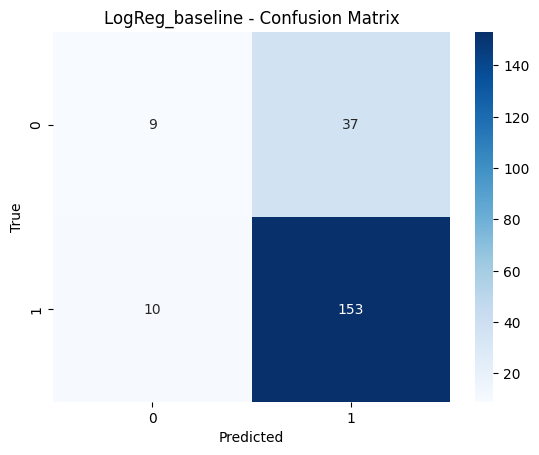

ROC-AUC: 0.670


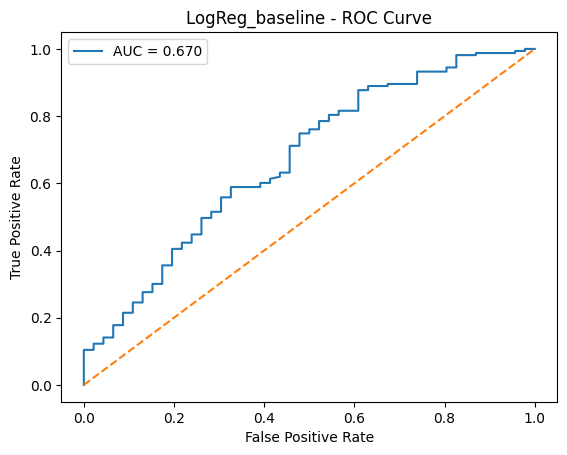


=== Tree_baseline ===
              precision    recall  f1-score   support

           0      0.262     0.239     0.250        46
           1      0.790     0.810     0.800       163

    accuracy                          0.684       209
   macro avg      0.526     0.524     0.525       209
weighted avg      0.674     0.684     0.679       209



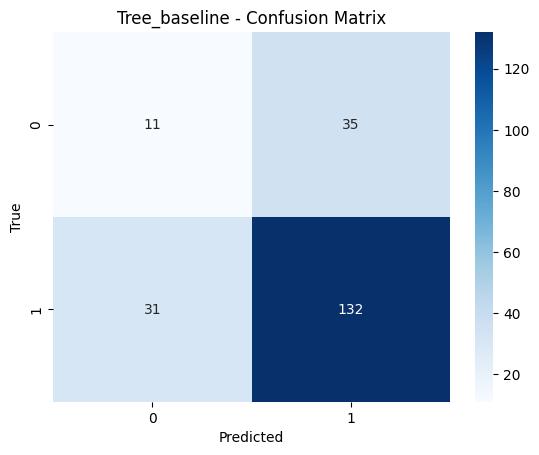

ROC-AUC: 0.524


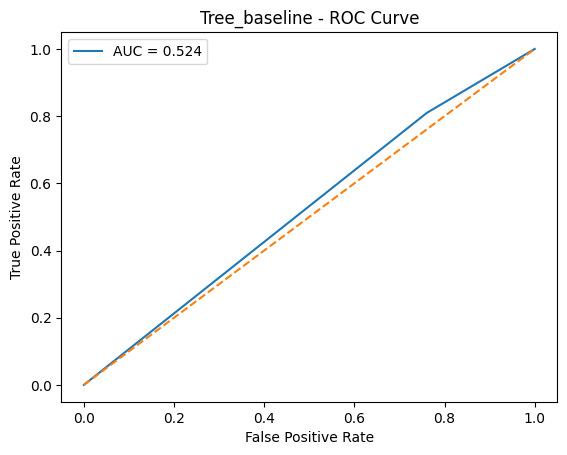


=== RF_baseline ===
              precision    recall  f1-score   support

           0      0.480     0.261     0.338        46
           1      0.815     0.920     0.865       163

    accuracy                          0.775       209
   macro avg      0.648     0.591     0.601       209
weighted avg      0.741     0.775     0.749       209



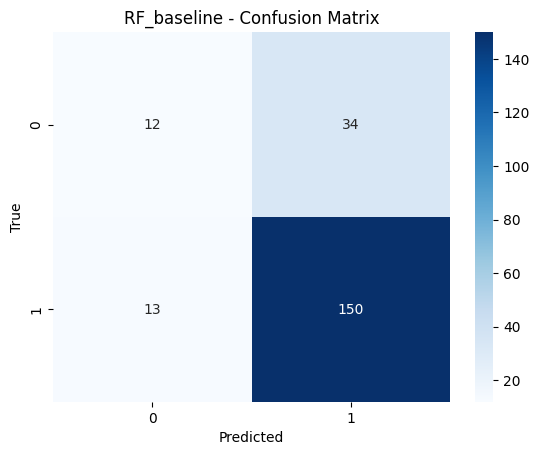

ROC-AUC: 0.663


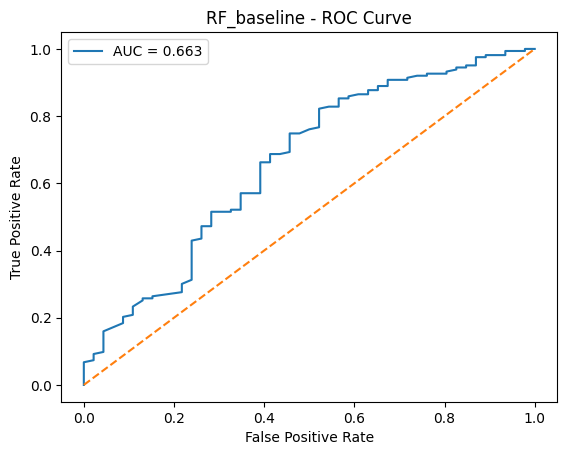


=== LogReg_SMOTE ===
              precision    recall  f1-score   support

           0      0.362     0.457     0.404        46
           1      0.834     0.773     0.803       163

    accuracy                          0.703       209
   macro avg      0.598     0.615     0.603       209
weighted avg      0.730     0.703     0.715       209



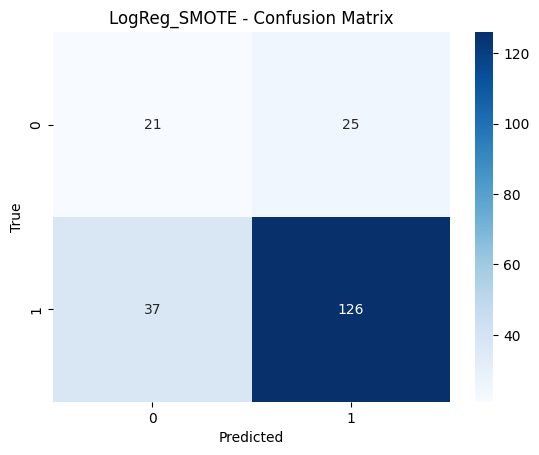

ROC-AUC: 0.655


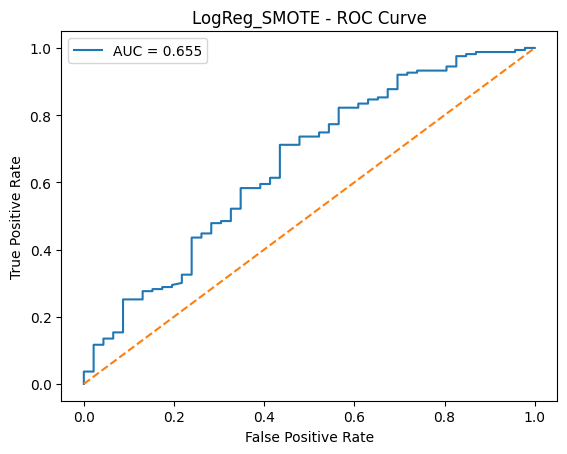


=== Tree_SMOTE ===
              precision    recall  f1-score   support

           0      0.306     0.326     0.316        46
           1      0.806     0.791     0.799       163

    accuracy                          0.689       209
   macro avg      0.556     0.559     0.557       209
weighted avg      0.696     0.689     0.692       209



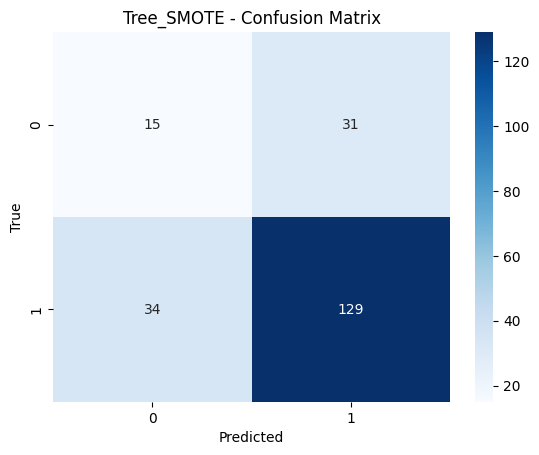

ROC-AUC: 0.559


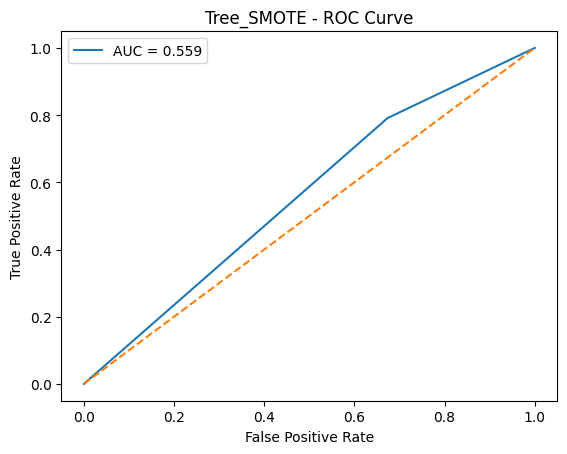


=== RF_SMOTE ===
              precision    recall  f1-score   support

           0      0.448     0.283     0.347        46
           1      0.817     0.902     0.857       163

    accuracy                          0.766       209
   macro avg      0.632     0.592     0.602       209
weighted avg      0.736     0.766     0.745       209



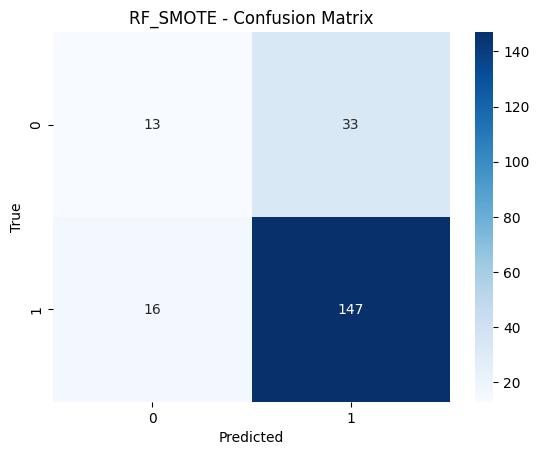

ROC-AUC: 0.661


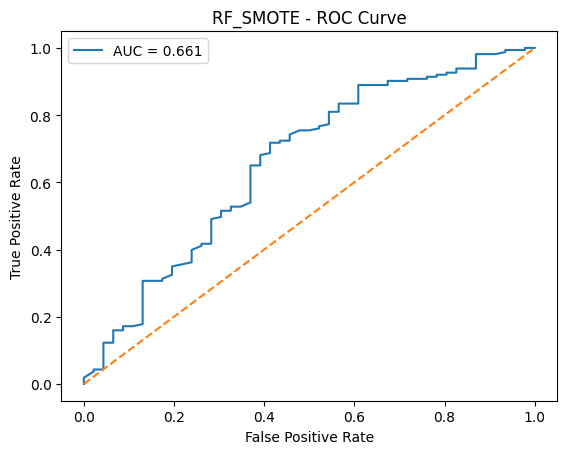


=== LogReg_weighted ===
              precision    recall  f1-score   support

           0      0.375     0.457     0.412        46
           1      0.837     0.785     0.810       163

    accuracy                          0.713       209
   macro avg      0.606     0.621     0.611       209
weighted avg      0.735     0.713     0.722       209



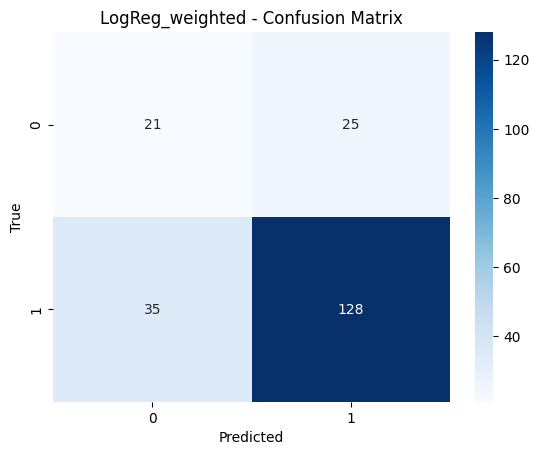

ROC-AUC: 0.669


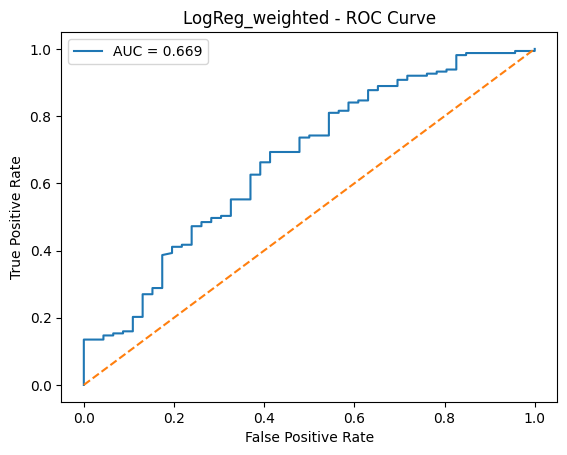


=== Tree_weighted ===
              precision    recall  f1-score   support

           0      0.344     0.239     0.282        46
           1      0.802     0.871     0.835       163

    accuracy                          0.732       209
   macro avg      0.573     0.555     0.559       209
weighted avg      0.701     0.732     0.714       209



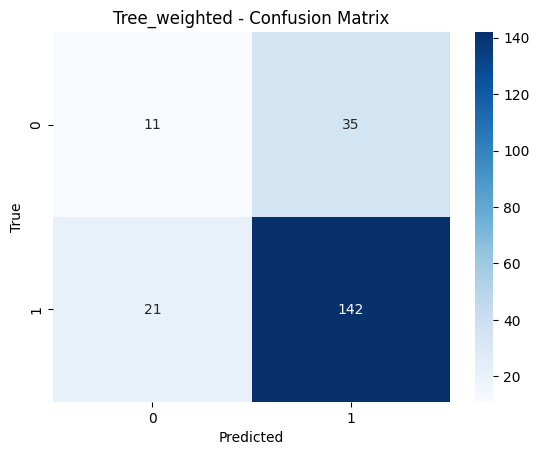

ROC-AUC: 0.556


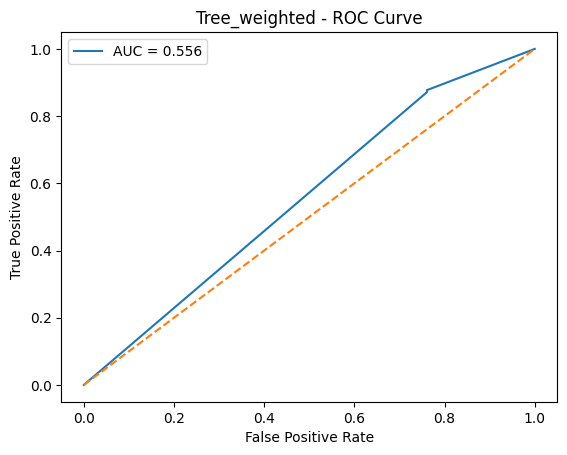


=== RF_weighted ===
              precision    recall  f1-score   support

           0      0.455     0.217     0.294        46
           1      0.807     0.926     0.863       163

    accuracy                          0.770       209
   macro avg      0.631     0.572     0.578       209
weighted avg      0.730     0.770     0.738       209



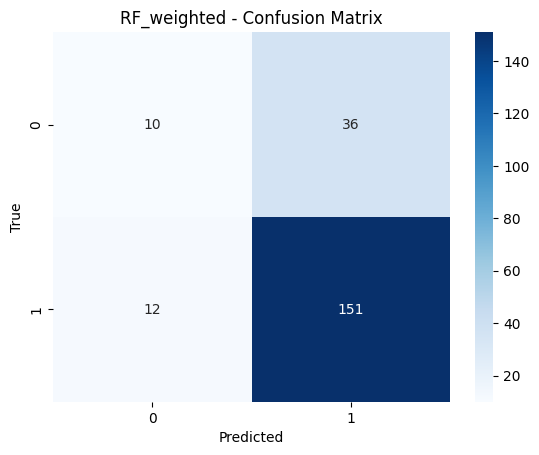

ROC-AUC: 0.655


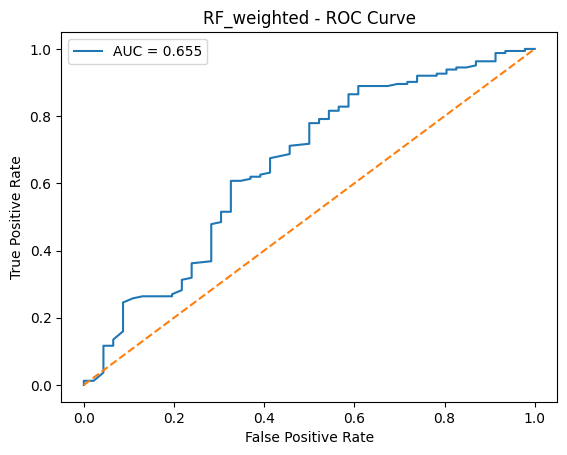

In [81]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ===== 1) Load data (semicolon-separated) =====
df_mat = pd.read_csv("student-mat.csv", sep=";")
df_por = pd.read_csv("student-por.csv", sep=";")
df = pd.concat([df_mat, df_por], axis=0).reset_index(drop=True)

# Target: Pass if G3 >= 10
df["Pass"] = (df["G3"] >= 10).astype(int)

# Drop grade columns to avoid leakage (predict final from non-grade features)
X = df.drop(columns=["G1", "G2", "G3", "Pass"])
y = df["Pass"]

# ===== 2) Class distribution check =====
print("Overall class distribution:")
print(y.value_counts(normalize=True).rename({0:"Fail", 1:"Pass"}))

# Train/test split (stratified to keep balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("\nTrain distribution:")
print(y_train.value_counts(normalize=True).rename({0:"Fail", 1:"Pass"}))
print("\nTest distribution:")
print(y_test.value_counts(normalize=True).rename({0:"Fail", 1:"Pass"}))

# ===== 3) Preprocessing =====
categorical_cols = X.select_dtypes(include=["object"]).columns.to_list()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.to_list()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# ===== 4) Define models =====
# Option A: no class weights
logreg = LogisticRegression(max_iter=2000, n_jobs=None)  # n_jobs not used in LR solver by default, but harmless
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=400, random_state=42)

# Option B: enable this if you prefer class weighting over SMOTE
logreg_bal = LogisticRegression(max_iter=2000, class_weight="balanced")
tree_bal = DecisionTreeClassifier(random_state=42, class_weight="balanced")
rf_bal = RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced")

# ===== 5) Pipelines =====
# 5a) Baseline (no SMOTE)
baseline_pipes = {
    "LogReg_baseline": Pipeline([("prep", preprocessor), ("clf", logreg)]),
    "Tree_baseline":   Pipeline([("prep", preprocessor), ("clf", tree)]),
    "RF_baseline":     Pipeline([("prep", preprocessor), ("clf", rf)]),
}

# 5b) With SMOTE (applied ONLY on training folds to prevent leakage)
smote = SMOTE(random_state=42)
smote_pipes = {
    "LogReg_SMOTE": ImbPipeline([("prep", preprocessor), ("smote", smote), ("clf", logreg)]),
    "Tree_SMOTE":   ImbPipeline([("prep", preprocessor), ("smote", smote), ("clf", tree)]),
    "RF_SMOTE":     ImbPipeline([("prep", preprocessor), ("smote", smote), ("clf", rf)]),
}

# 5c) Class-weighted (alternative to SMOTE)
weighted_pipes = {
    "LogReg_weighted": Pipeline([("prep", preprocessor), ("clf", logreg_bal)]),
    "Tree_weighted":   Pipeline([("prep", preprocessor), ("clf", tree_bal)]),
    "RF_weighted":     Pipeline([("prep", preprocessor), ("clf", rf_bal)]),
}

# ===== 6) Helper: evaluate and plot =====
def evaluate_and_plot(name, pipe, X_train, X_test, y_train, y_test):
    # Fit
    pipe.fit(X_train, y_train)
    # Predict
    y_pred = pipe.predict(X_test)
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
    else:
        # Fallback: use decision_function if available; else None
        y_proba = getattr(pipe, "decision_function", lambda X: None)(X_test)
        if y_proba is not None:
            # Scale decision scores to [0,1] roughly for ROC (optional)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min() + 1e-9)

    # Metrics
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC-AUC
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        print(f"ROC-AUC: {auc:.3f}")
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
        plt.plot([0,1],[0,1],"--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} - ROC Curve")
        plt.legend()
        plt.show()

# ===== 7) Cross-validated AUC (optional quick sanity check) =====
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
def cv_auc(name, pipe):
    scores = cross_val_score(pipe, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
    print(f"{name} CV ROC-AUC: mean={scores.mean():.3f} ± {scores.std():.3f}")

print("\n--- Cross-validated AUC on training set (for model selection) ---")
for name, p in {**baseline_pipes, **smote_pipes, **weighted_pipes}.items():
    cv_auc(name, p)

# ===== 8) Final evaluation on the held-out test set =====
for name, p in baseline_pipes.items():
    evaluate_and_plot(name, p, X_train, X_test, y_train, y_test)

for name, p in smote_pipes.items():
    evaluate_and_plot(name, p, X_train, X_test, y_train, y_test)

for name, p in weighted_pipes.items():
    evaluate_and_plot(name, p, X_train, X_test, y_train, y_test)

# Task
Perform an end-to-end comparison of baseline, SMOTE, and class-weighted variants for Logistic Regression and Random Forest models. Tune each variant using GridSearchCV with StratifiedKFold cross-validation, optimizing for ROC-AUC. Evaluate the best model of each variant on the held-out test set, print a comparison table of their performance, and export the overall best model along with its feature names.

## Define pipelines

### Subtask:
Create pipelines for each model variant (baseline, SMOTE, class-weighted) for both Logistic Regression and Random Forest, incorporating the preprocessor.


**Reasoning**:
Create the pipelines for baseline, SMOTE, and class-weighted models as requested in the instructions.



In [83]:
# 5a) Baseline (no SMOTE)
baseline_pipes = {
    "LogReg_baseline": Pipeline([("prep", preprocessor), ("clf", logreg)]),
    "RF_baseline":     Pipeline([("prep", preprocessor), ("clf", rf)]),
}

# 5b) With SMOTE (applied ONLY on training folds to prevent leakage)
smote = SMOTE(random_state=42)
smote_pipes = {
    "LogReg_SMOTE": ImbPipeline([("prep", preprocessor), ("smote", smote), ("clf", logreg)]),
    "RF_SMOTE":     ImbPipeline([("prep", preprocessor), ("smote", smote), ("clf", rf)]),
}

# 5c) Class-weighted (alternative to SMOTE)
weighted_pipes = {
    "LogReg_weighted": Pipeline([("prep", preprocessor), ("clf", logreg_bal)]),
    "RF_weighted":     Pipeline([("prep", preprocessor), ("clf", rf_bal)]),
}

## Define parameter grids

### Subtask:
Set up parameter grids for hyperparameter tuning for each model within the pipelines.


**Reasoning**:
Create parameter grids for Logistic Regression and Random Forest models for hyperparameter tuning.



In [84]:
# Create a dictionary named lr_grid for Logistic Regression hyperparameters.
lr_grid = {
    'clf__C': [0.1, 1.0, 3.0, 10.0],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

# Create a dictionary named rf_grid for Random Forest hyperparameters.
rf_grid = {
    'clf__n_estimators': [200, 400],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

# Create a dictionary named logreg_grid for Logistic Regression hyperparameters with class weights.
logreg_grid = {
    'clf__C': [0.1, 1.0, 10.0],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs'],
    'clf__class_weight': [None, 'balanced']
}

print("Logistic Regression Grid (lr_grid):", lr_grid)
print("Random Forest Grid (rf_grid):", rf_grid)
print("Logistic Regression Grid with class weights (logreg_grid):", logreg_grid)

Logistic Regression Grid (lr_grid): {'clf__C': [0.1, 1.0, 3.0, 10.0], 'clf__penalty': ['l2'], 'clf__solver': ['lbfgs', 'liblinear']}
Random Forest Grid (rf_grid): {'clf__n_estimators': [200, 400], 'clf__max_depth': [None, 10, 20], 'clf__min_samples_split': [2, 5], 'clf__min_samples_leaf': [1, 2]}
Logistic Regression Grid with class weights (logreg_grid): {'clf__C': [0.1, 1.0, 10.0], 'clf__penalty': ['l2'], 'clf__solver': ['lbfgs'], 'clf__class_weight': [None, 'balanced']}


## Set up cross-validation and scorers

### Subtask:
Define the cross-validation strategy and the scoring metrics (ROC-AUC and F1).


**Reasoning**:
Define the cross-validation strategy and the scoring metrics.



In [87]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, f1_score

# Set up Stratified K-Fold cross-validation
# Using a reasonable number of splits (e.g., 5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
# Using make_scorer for f1_score to be compatible with GridSearchCV
scorers = {
    'roc_auc': 'roc_auc', # ROC-AUC score
    'f1': make_scorer(f1_score) # F1-score
}

print("Cross-validation strategy (StratifiedKFold):", cv)
print("Scoring metrics for GridSearchCV:", scorers)

Cross-validation strategy (StratifiedKFold): StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Scoring metrics for GridSearchCV: {'roc_auc': 'roc_auc', 'f1': make_scorer(f1_score, response_method='predict')}


In [88]:
from sklearn.model_selection import GridSearchCV

# Ensure pipelines (baseline_pipes, smote_pipes, weighted_pipes) are defined
# Ensure parameter grids (lr_grid, rf_grid, logreg_grid) are defined
# Ensure cross-validation (cv) and scorers are defined

# Dictionary to store GridSearchCV results
grid_searches = {}

# Perform Grid Search for each pipeline
print("Performing Grid Search for each model variant...")

# Baseline models
for name, pipe in baseline_pipes.items():
    print(f"\nTuning {name}...")
    param_grid = lr_grid if "LogReg" in name else rf_grid
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scorers,
        refit="roc_auc", # Optimize for ROC-AUC
        cv=cv,
        n_jobs=-1, # Use all available cores
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    grid_searches[name] = grid_search
    print(f"Finished tuning {name}. Best ROC-AUC: {grid_search.best_score_:.3f}")

# SMOTE models
for name, pipe in smote_pipes.items():
    print(f"\nTuning {name}...")
    param_grid = lr_grid if "LogReg" in name else rf_grid
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scorers,
        refit="roc_auc", # Optimize for ROC-AUC
        cv=cv,
        n_jobs=-1, # Use all available cores
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    grid_searches[name] = grid_search
    print(f"Finished tuning {name}. Best ROC-AUC: {grid_search.best_score_:.3f}")

# Class-weighted models
for name, pipe in weighted_pipes.items():
    print(f"\nTuning {name}...")
    # Use logreg_grid for Logistic Regression weighted, and rf_grid for Random Forest weighted
    param_grid = logreg_grid if "LogReg" in name else rf_grid
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scorers,
        refit="roc_auc", # Optimize for ROC-AUC
        cv=cv,
        n_jobs=-1, # Use all available cores
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    grid_searches[name] = grid_search
    print(f"Finished tuning {name}. Best ROC-AUC: {grid_search.best_score_:.3f}")

print("\nGrid Search complete for all models.")

Performing Grid Search for each model variant...

Tuning LogReg_baseline...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Finished tuning LogReg_baseline. Best ROC-AUC: 0.738

Tuning RF_baseline...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Finished tuning RF_baseline. Best ROC-AUC: 0.755

Tuning LogReg_SMOTE...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Finished tuning LogReg_SMOTE. Best ROC-AUC: 0.738

Tuning RF_SMOTE...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Finished tuning RF_SMOTE. Best ROC-AUC: 0.751

Tuning LogReg_weighted...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Finished tuning LogReg_weighted. Best ROC-AUC: 0.736

Tuning RF_weighted...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Finished tuning RF_weighted. Best ROC-AUC: 0.749

Grid Search complete for all models.


* Using SHAP on Random Forest

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Dictionary to store test set evaluation results
test_results = {}

print("Evaluating best models on the held-out test set...")

# Iterate through the completed grid searches
for name, grid_search in grid_searches.items():
    print(f"\n=== Evaluating {name} ===")
    # Get the best estimator from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, digits=3, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Calculate ROC-AUC
    # Check if the model has predict_proba (needed for ROC-AUC)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1] # Probability of the positive class (class 1)
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC: {roc_auc:.3f}")
        report['roc_auc'] = roc_auc # Add ROC-AUC to the report dictionary for comparison table
    else:
        print("Model does not have predict_proba, cannot calculate ROC-AUC.")
        report['roc_auc'] = None


    # Store key metrics in the test_results dictionary
    test_results[name] = {
        'accuracy': report['accuracy'],
        'precision_0': report['0']['precision'],
        'recall_0': report['0']['recall'],
        'f1_0': report['0']['f1-score'],
        'precision_1': report['1']['precision'],
        'recall_1': report['1']['recall'],
        'f1_1': report['1']['f1-score'],
        'roc_auc': report['roc_auc']
    }

print("\nTest set evaluation complete for all best models.")

Evaluating best models on the held-out test set...

=== Evaluating LogReg_baseline ===
Classification Report:
              precision    recall  f1-score   support

           0      0.529     0.196     0.286        46
           1      0.807     0.951     0.873       163

    accuracy                          0.785       209
   macro avg      0.668     0.573     0.579       209
weighted avg      0.746     0.785     0.744       209

Confusion Matrix:
[[  9  37]
 [  8 155]]
ROC-AUC: 0.681

=== Evaluating RF_baseline ===
Classification Report:
              precision    recall  f1-score   support

           0      0.667     0.217     0.328        46
           1      0.814     0.969     0.885       163

    accuracy                          0.804       209
   macro avg      0.741     0.593     0.607       209
weighted avg      0.782     0.804     0.762       209

Confusion Matrix:
[[ 10  36]
 [  5 158]]
ROC-AUC: 0.674

=== Evaluating LogReg_SMOTE ===
Classification Report:
             

In [90]:
import pandas as pd

# Ensure test_results dictionary is populated from the previous step

print("--- Model Comparison on Held-Out Test Set ---")

# Convert the test_results dictionary to a pandas DataFrame for easy display
comparison_df = pd.DataFrame.from_dict(test_results, orient='index')

# Select and reorder columns for better readability
comparison_cols = [
    'roc_auc',
    'accuracy',
    'precision_1',
    'recall_1',
    'f1_1',
    'precision_0',
    'recall_0',
    'f1_0'
]
comparison_df = comparison_df[comparison_cols]

# Rename columns for clarity
comparison_df.columns = [
    'Test ROC-AUC',
    'Test Accuracy',
    'Test Precision (Pass)',
    'Test Recall (Pass)',
    'Test F1 (Pass)',
    'Test Precision (Fail)',
    'Test Recall (Fail)',
    'Test F1 (Fail)'
]

# Display the comparison table, sorted by Test ROC-AUC
display(comparison_df.sort_values(by='Test ROC-AUC', ascending=False))

--- Model Comparison on Held-Out Test Set ---


,Test ROC-AUC,Test Accuracy,Test Precision (Pass),Test Recall (Pass),Test F1 (Pass),Test Precision (Fail),Test Recall (Fail),Test F1 (Fail)
LogReg_baseline,0.681182,0.784689,0.807292,0.950920,0.873239,0.529412,0.195652,0.285714
LogReg_weighted,0.678781,0.708134,0.840000,0.773006,0.805112,0.372881,0.478261,0.419048
RF_weighted,0.677047,0.784689,0.824176,0.920245,0.869565,0.518519,0.304348,0.383562
RF_SMOTE,0.675047,0.794258,0.826087,0.932515,0.876081,0.560000,0.304348,0.394366
LogReg_SMOTE,0.674113,0.717703,0.837662,0.791411,0.813880,0.381818,0.456522,0.415842
RF_baseline,0.673846,0.803828,0.814433,0.969325,0.885154,0.666667,0.217391,0.327869


In [92]:
import joblib
import os

# Ensure comparison_df and grid_searches are available from previous steps

# Identify the name of the best model based on Test ROC-AUC from the comparison table
best_model_name = comparison_df['Test ROC-AUC'].idxmax()

print(f"The overall best model based on Test ROC-AUC is: {best_model_name}")

# Retrieve the best estimator for the overall best model from the grid_searches results
overall_best_model = grid_searches[best_model_name].best_estimator_

# Get the feature names from the preprocessor in the best model's pipeline
# We need to fit the preprocessor separately on the training data to get the feature names
# Alternatively, if the best_model pipeline was fitted on X_train, we can get names after fitting
# Let's refit the preprocessor on X_train just to be sure we get the correct names
fitted_preprocessor = overall_best_model.named_steps['prep'].fit(X_train, y_train)
feature_names = fitted_preprocessor.get_feature_names_out()


# Define file paths for exporting
model_filename = f"{best_model_name}_best_model.joblib"
feature_names_filename = f"{best_model_name}_feature_names.joblib"

# Export the overall best model
try:
    joblib.dump(overall_best_model, model_filename)
    print(f"Overall best model exported successfully to {model_filename}")
except Exception as e:
    print(f"Error exporting the model: {e}")

# Export the feature names
try:
    joblib.dump(feature_names, feature_names_filename)
    print(f"Feature names exported successfully to {feature_names_filename}")
except Exception as e:
    print(f"Error exporting feature names: {e}")

print("\nTask complete: Overall best model and feature names have been identified and exported.")

The overall best model based on Test ROC-AUC is: LogReg_baseline
Overall best model exported successfully to LogReg_baseline_best_model.joblib
Feature names exported successfully to LogReg_baseline_feature_names.joblib

Task complete: Overall best model and feature names have been identified and exported.


Calculating SHAP values for the overall best model (LogReg_baseline)...
Assuming SHAP values are (n_samples, n_features) for the positive class.

SHAP Summary Plot (Passed Class - 1) for Logistic Regression:


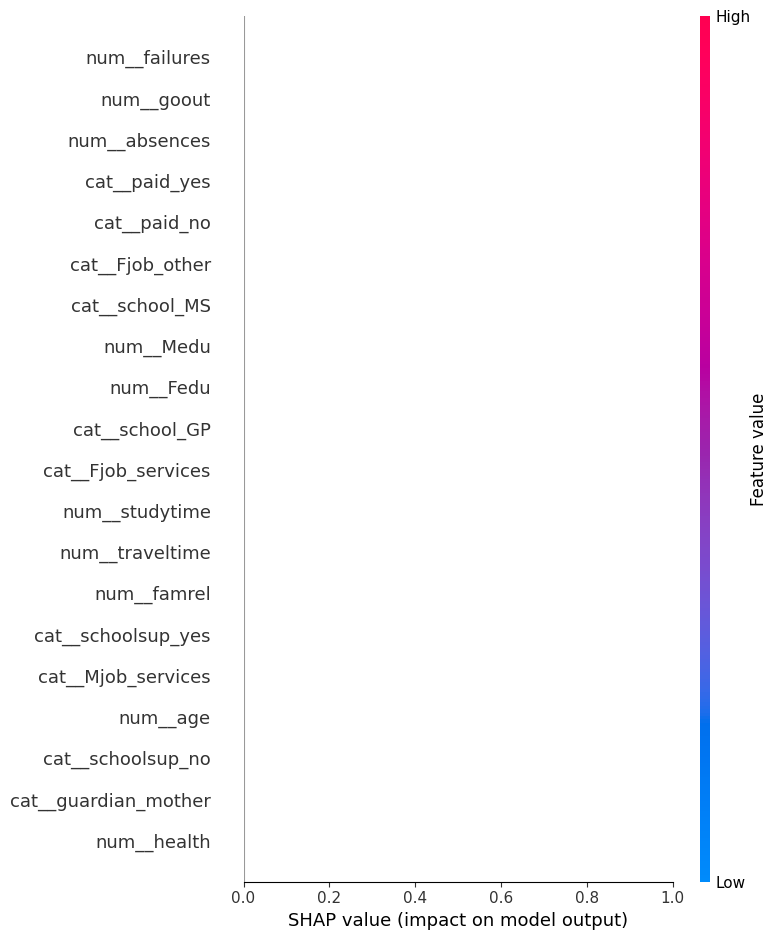


SHAP Bar Plot of Mean Absolute SHAP Values (Passed Class - 1):


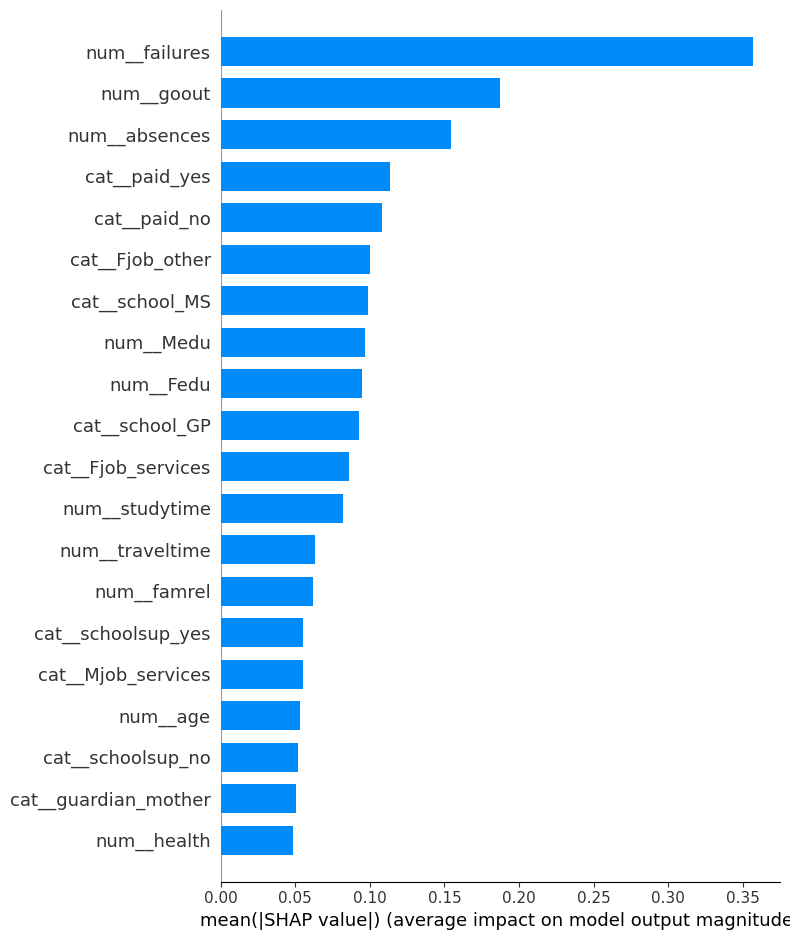

In [94]:
# Assuming grid_searches dictionary is available from the GridSearchCV step
# Assuming X_train, X_test, and preprocessor are available

import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for feature_names Series

print("Calculating SHAP values for the overall best model (LogReg_baseline)...")

# Explicitly retrieve the best LogReg_baseline model from grid_searches
# Based on previous output, LogReg_baseline was the overall best
if 'LogReg_baseline' in grid_searches:
    best_lr_pipeline = grid_searches['LogReg_baseline'].best_estimator_
else:
    print("LogReg_baseline model not found in grid_searches. Please run the GridSearchCV cell.")
    best_lr_pipeline = None

if best_lr_pipeline:
    # Get the fitted preprocessor and the Logistic Regression classifier from the pipeline
    fitted_prep = best_lr_pipeline.named_steps['prep']
    lr_model = best_lr_pipeline.named_steps['clf']

    # Transform the training and test data using the fitted preprocessor
    X_train_enc = fitted_prep.transform(X_train)
    X_test_enc = fitted_prep.transform(X_test)

    # Ensure encoded data is in a dense format for SHAP explainers
    if hasattr(X_train_enc, 'toarray'):
        X_train_enc_dense = X_train_enc.toarray()
    else:
        X_train_enc_dense = X_train_enc

    if hasattr(X_test_enc, 'toarray'):
        X_test_enc_dense = X_test_enc.toarray()
    else:
        X_test_enc_dense = X_test_enc


    # Create a SHAP LinearExplainer for the Logistic Regression model
    # Using the encoded training data as the background dataset
    # Use a smaller subset of training data for performance if needed: X_train_enc_dense[:100]
    explainer = shap.LinearExplainer(lr_model, X_train_enc_dense)

    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test_enc_dense)

    # Get feature names
    feature_names = fitted_prep.get_feature_names_out()

    # For binary Logistic Regression, shap_values is often an array of shape (n_samples, n_features)
    # representing the SHAP values for the positive class (class 1) in log-odds.
    # If it's a list, take the SHAP values for class 1
    if isinstance(shap_values, list) and len(shap_values) > 1:
        shap_values_class1 = shap_values[1] # SHAP values for class 1
        # For LinearExplainer with multi-output, expected_value is also a list
        expected_value_class1 = explainer.expected_value[1]
    elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 2:
        # Assume this is the SHAP values for the positive class (log-odds)
        print("Assuming SHAP values are (n_samples, n_features) for the positive class.")
        shap_values_class1 = shap_values
        # For LinearExplainer with single output, expected_value is a scalar
        expected_value_class1 = explainer.expected_value
    else:
        print("Unexpected SHAP values format from LinearExplainer.")
        shap_values_class1 = None
        expected_value_class1 = None


    if shap_values_class1 is not None and expected_value_class1 is not None:
        # Create a shap.Explanation object for class 1 for plotting
        shap_explanation_class1 = shap.Explanation(values=shap_values_class1,
                                                   base_values=expected_value_class1,
                                                   data=X_test_enc_dense,
                                                   feature_names=feature_names)

        # Generate SHAP summary plot (Beeswarm style is often informative)
        print("\nSHAP Summary Plot (Passed Class - 1) for Logistic Regression:")
        shap.summary_plot(shap_explanation_class1, plot_type='beeswarm')

        # Optionally, generate a summary bar plot as well
        print("\nSHAP Bar Plot of Mean Absolute SHAP Values (Passed Class - 1):")
        shap.summary_plot(shap_explanation_class1, plot_type='bar')

    else:
        print("Could not generate SHAP plots due to unexpected SHAP values format or missing expected value.")

Looking at the SHAP Beeswarm Plot (Passed Class - 1):

* Each row represents a feature.
    Each point on the row is a data point from the test set.
    The position of the point on the x-axis shows the SHAP value for that feature for that specific data point. A positive SHAP value means the feature's value for that data point increases the likelihood of the student passing (pushing the prediction towards class 1). A negative SHAP value means it decreases the likelihood of passing (pushing the prediction towards class 0).
The color of the point indicates the feature value for that data point (usually red for high values, blue for low values).
    From the plot, we can see which features have the largest spread of SHAP values, indicating they have a strong impact on the predictions. Features higher up on the plot are generally more important.

* Based on the plot, some of the most influential features for predicting if a student passes are:

 * num_failures: This feature seems to have a strong negative impact. Lower values (blue) tend to have positive SHAP values (increasing likelihood of passing), while higher values (red) tend to have negative SHAP values (decreasing likelihood of passing). This makes intuitive sense – more past failures are associated with a lower chance of passing.
* num_goout: This feature also appears influential. The impact varies, but generally, higher values (red) seem associated with negative SHAP values, suggesting that going out more often might decrease the likelihood of passing.
* num_absences: Similar to failures, higher values (red) for absences are associated with negative SHAP values, indicating that more absences decrease the chance of passing.
cat_paid_yes / cat_paid_no: Having paid extra classes (cat_paid_yes) seems to have a generally positive impact (positive SHAP values), while not having them (cat_paid_no) has a negative impact.
* Parent's Education (num_Medu, num_Fedu): Higher levels of mother's and father's education tend to be associated with positive SHAP values, suggesting a positive influence on the likelihood of passing.
    The SHAP Bar Plot provides a summary by showing the mean absolute SHAP value for each feature, averaged across all test data points. This gives an overall ranking of feature importance based on magnitude of impact. It confirms that num_failures, num_goout, and num_absences are among the most important features, along with cat_paid_yes/no and parental education levels.

These interpretations align with common sense factors that might influence student performance.